In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf 

In [5]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\CocaCola_Sales_Rawdata_new.csv")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


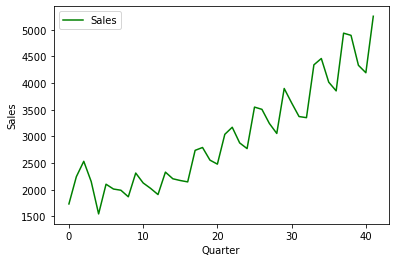

In [11]:
data.plot(color='green')
pyplot.xlabel('Quarter')
pyplot.ylabel('Sales')
pyplot.show()

## Histogram and Density Plots


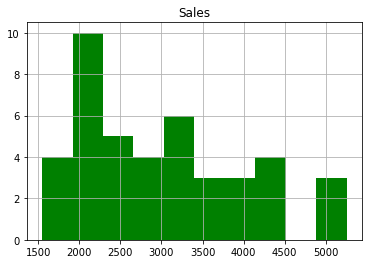

In [14]:
data.hist(color="green")
pyplot.show()

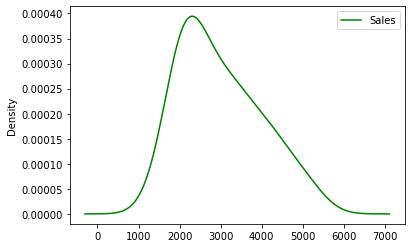

In [15]:
data.plot(kind='kde',color="green")
pyplot.show()

## Time series decomposition plot


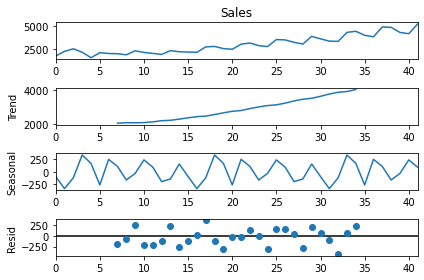

In [20]:
decompose_ts_add = seasonal_decompose(data.Sales,period=15)
decompose_ts_add.plot()
pyplot.show()

## ACF plots and PACF plots

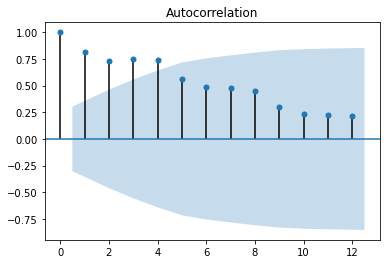

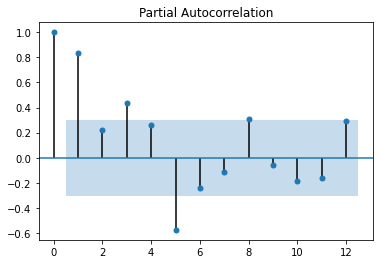

In [21]:
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
pyplot.show()


In [22]:
quarters=['Q1','Q2','Q3','Q4']
data["quarters"]=0
p = data["Quarter"][0]
p[0:2]

'Q1'

In [23]:
for i in range(42):
    p = data["Quarter"][i]
    data['quarters'][i]= p[0:2]
    

<ipython-input-23-79a91d6a6750>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarters'][i]= p[0:2]
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
quarter_dummies = pd.DataFrame(pd.get_dummies(data['quarters']))
data1 = pd.concat([data,quarter_dummies],axis = 1)
data1["t"] = np.arange(1,43)


In [26]:
data1["t_squared"] = data1["t"]*data1["t"]
data1["log_Sales"] = np.log(data1["Sales"])
data1.head()

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [28]:
Train = data1.head(30)
Test = data1.tail(12)
Test=Test.set_index(np.arange(1,13))


# LINEAR

In [30]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.014448381834

# Exponential

In [31]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

552.2821039688286

# Quadratic

In [32]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad


646.271542865604

# Additive seasonality

In [33]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467724012

# Additive Seasonality Quadratic

In [34]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

586.053306842571

# Multiplicative Seasonality

In [35]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238911891907

# Multiplicative Additive Seasonality

In [36]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 


410.2497060532234

# Testing

In [37]:
Testing = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(Testing)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,714.014448
1,rmse_Exp,552.282104
2,rmse_Quad,646.271543
3,rmse_add_sea,1778.006547
4,rmse_add_sea_quad,586.053307
5,rmse_Mult_sea,1828.923891
6,rmse_Mult_add_sea,410.249706


###  The Rmse value for Multiplicative Additive Seasonality is least i.e. 410.24 thus  we use this model